# Machine Learning Final Exam, Aug Semester, 2020

In this exam, you will demonstrate your understanding of the material from the lectures and labs.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.
Note that you have **2.5 hours** to do the exam. Also note that there are some short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

Download the [CSV dataset](http://www.cs.ait.ac.th/~mdailey/class/ml/final-exam-data.csv) for the exam.
Note that the data are two dimensional with labels '0' and '1'. Provide a scatter plot for the data with
the two classes shown in different colors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
# Place code to load the data and plot the scatterplot here
df = pd.read_csv('final-exam-data.csv')
df.columns = df.columns.str.replace('# x1', 'x1')
df.head()

,x1,x2,y
0,3.974170,3.138378,0.0
1,6.037439,7.155408,1.0
2,3.619643,2.524895,1.0
3,3.366346,3.106862,0.0
4,3.743221,9.250866,1.0


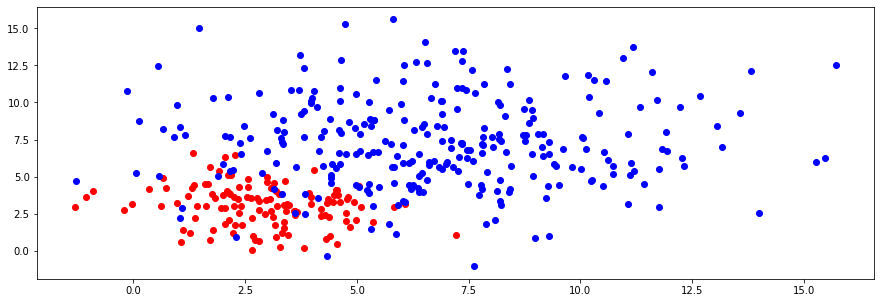

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(df['x1'][df['y']==0], df['x2'][df['y']==0], 'ro')
plt.plot(df['x1'][df['y']==1],df['x2'][df['y']==1], 'bo')
plt.show()

## Question 2 (30 points)

Do the following:
1. Split the dataset from Question 1 into a training set (80%) and validation set (20%).
2. Using the logistic regression code we developed in lab, fit a logistic regression model to the data in the training set.
3. Indicate the training set accuracy and validation set accuracy of the logistic regression model.
4. Make two separate plots, one for the training set and one for the validation set, with three colors: one for correctly classified points from class 1, one for correctly classified points from class 2, and one for incorrectly classified points.

In [4]:
import random
def partition(X, y, percent_train=0.8):
    m = y.shape[0]
    idx = np.arange(0,m)
    random.seed(1412)
    random.shuffle(idx)
    m_train = int(m * percent_train)
    train_idx = idx[:m_train]
    test_idx = idx[m_train:]
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    return X_train, y_train.reshape(-1,1), X_test, y_test.reshape(-1,1)

In [5]:
df = pd.DataFrame(df).to_numpy()
X = df[:,:-1]
y = df[:,-1]
X.shape,y.shape

((400, 2), (400,))

In [6]:
X_train, y_train, X_val, y_val = partition(X,y,percent_train=0.8)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((320, 2), (320, 1), (80, 2), (80, 1))

In [7]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0]
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        #print(cost)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history

In [8]:
X_train_aug = np.insert(X_train, 0, 1,axis=1)
theta_initial = np.ones((X_train_aug.shape[1],1))
print('X shape :',X_train_aug.shape)
print('theta_initial :',theta_initial.shape)
theta_train, j_history = train(X_train_aug, y_train, theta_initial, 0.05, 2000)

print('Optimal theta: %f, %f, %f' % (theta_train[0],theta_train[1],theta_train[2]))
print('Cost Funtion reducet from %f to  %f in %d itreations' % (j_history[0],j_history[-1],2000))

X shape : (320, 3)
theta_initial : (3, 1)
Optimal theta: -4.103871, 0.478478, 0.602768
Cost Funtion reducet from 2.144578 to  0.243613 in 2000 itreations


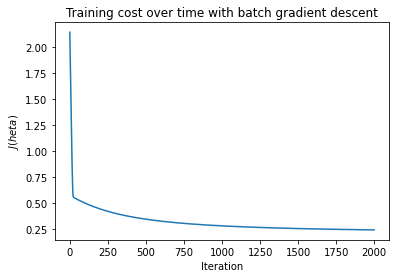

In [9]:
plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent")
plt.show()

In [10]:
X_train_aug.shape,theta_train.shape

((320, 3), (3, 1))

In [11]:
yhat_train = h(X_train_aug, theta_train)
yhat_train.shape

(320, 1)

In [12]:
X_val_aug = np.insert(X_val,0,1,axis=1)
yhat_val = h(X_val_aug, theta_train)
yhat_val.shape

(80, 1)

In [13]:
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

In [14]:
def plot_data_with_correctness(X, y, yhat, theta, title):
    X_0_corr = X[np.logical_and(y == 0, yhat < 0.5).flat]
    X_0_incorr = X[np.logical_and(y == 0, yhat >= 0.5).flat]
    X_1_corr = X[np.logical_and(y == 1, yhat >= 0.5).flat]
    X_1_incorr = X[np.logical_and(y == 1, yhat < 0.5).flat]
    plt.figure(figsize=(7, 7))
    plt.plot(X_0_corr[:,0], X_0_corr[:,1], 'ro')
    plt.plot(X_0_incorr[:,0], X_0_incorr[:,1], 'r*', markersize=10)
    plt.plot(X_1_corr[:,0], X_1_corr[:,1], 'bo')
    plt.plot(X_1_incorr[:,0], X_1_incorr[:,1], 'b*', markersize=10)
    #Line Plot
    point_1, point_2 = boundary_points(X, theta)
    print('Point 1:', point_1)
    print('Point 2:', point_2)
    plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-')
    plt.title(title)
    plt.axis('equal')

Point 1: [[10.67405448]
 [-1.66469371]]
Point 2: [[-3.08829617]
 [ 9.25986065]]
Point 1: [[ 9.76354784]
 [-0.94193351]]
Point 2: [[-1.23567775]
 [ 7.7892521 ]]


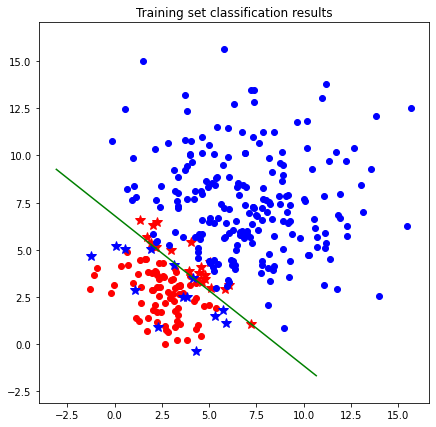

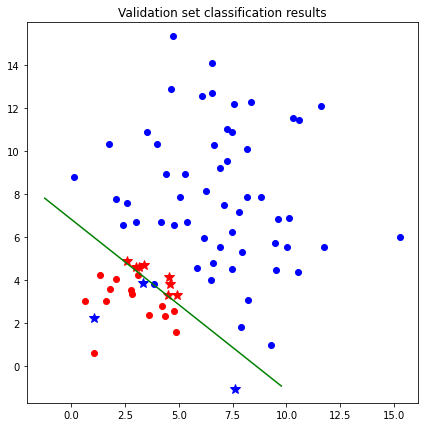

In [15]:
plot_data_with_correctness(X_train, y_train, yhat_train, theta_train, 'Training set classification results')
plot_data_with_correctness(X_val, y_val, yhat_val, theta_train, 'Validation set classification results')

In [16]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

In [17]:
y_test_pred_soft = h(X_val_aug, theta_train)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y_val, y_test_pred_soft)
test_rsq_hard = r_squared(y_val, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_val).astype(int).sum() / y_val.shape[0]

print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))

Got test set soft R^2 0.5984, hard R^2 0.3103, accuracy 0.86


## Question 3 (20 points)

Repeat Question 2 using the PyTorch neural network library. Your PyTorch model should have a single linear layer with two inputs and a single output, a logistic sigmoid activation function, binary cross entropy loss function, and stochastic gradient descent for the optimizer. Show the same plots you showed for Question 2.

In [36]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [37]:
X.shape,y.shape

((400, 2), (400,))

In [38]:
# hyperparameters
input_size = 2 #X1 X2
output_size = 2 #0 1
hidden_size = 10

epochs = 20
batch_size = 50
learning_rate = 0.01

In [39]:
# Place code to build, train, and evaluate your PyTorch model here
class NetworkQ3(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.l1(x)
        x = self.sigmoid(x)
        return x

In [40]:
modelQ3 = NetworkQ3()
optimizer = optim.SGD(modelQ3.parameters(), lr=0.001, momentum=0.9)
loss_func = nn.BCELoss()

In [41]:
X_train_tensor = torch.FloatTensor(X_train.tolist())
y_train_tensor = torch.LongTensor(y_train)
y_train_tensor = torch.reshape(y_train_tensor,(-1,))
X_train_tensor.shape,y_train_tensor.shape

(torch.Size([320, 2]), torch.Size([320]))

In [42]:
loss_log = []

for e in range(epochs):
    for i in range(0, X_train_tensor.shape[0], batch_size):
        x_mini = X_train_tensor[i:i + batch_size].to(torch.float32) 
        y_mini = y_train_tensor[i:i + batch_size].to(torch.float32) 
        
        x_var = Variable(x_mini,requires_grad=True)
        y_var = Variable(y_mini,requires_grad=True)
        optimizer.zero_grad()
        y_pred = modelQ3(x_var)
        _,y_pred = torch.max(y_pred, 1)
        # print(y_var.dtype,y_pred.dtype)
        y_var = y_var.to(torch.float32)
        y_pred = y_pred.to(torch.float32)
        # print(y_var.dtype,y_pred.dtype)
        loss = loss_func(y_pred, y_var)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            loss_log.append(loss.item())
        
    print('Epoch: {} - Loss: {:.2f}'.format(e, loss.item()))

Epoch: 0 - Loss: 80.00
Epoch: 1 - Loss: 80.00
Epoch: 2 - Loss: 80.00
Epoch: 3 - Loss: 80.00
Epoch: 4 - Loss: 80.00
Epoch: 5 - Loss: 80.00
Epoch: 6 - Loss: 80.00
Epoch: 7 - Loss: 80.00
Epoch: 8 - Loss: 80.00
Epoch: 9 - Loss: 80.00
Epoch: 10 - Loss: 80.00
Epoch: 11 - Loss: 80.00
Epoch: 12 - Loss: 80.00
Epoch: 13 - Loss: 80.00
Epoch: 14 - Loss: 80.00
Epoch: 15 - Loss: 80.00
Epoch: 16 - Loss: 80.00
Epoch: 17 - Loss: 80.00
Epoch: 18 - Loss: 80.00
Epoch: 19 - Loss: 80.00


## Question 4 (20 points)

Add a 10-unit hidden layer with ReLU activation to the PyTorch model from Question 3. Plot training loss and validation loss as function of epoch of training. Do you see any evidence of overfitting?

In [43]:
# Place code to build, train, and evaluate your PyTorch model here
class NetworkQ4(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.l2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.l1(x)
        x = self.sigmoid(x)
        x = self.l2(x)
        x = self.relu(x)
        return x

In [44]:
modelQ4 = NetworkQ4()
optimizer = optim.SGD(modelQ3.parameters(), lr=0.001, momentum=0.9)
loss_func = nn.BCELoss()

In [45]:
loss_log = []

for e in range(epochs):
    for i in range(0, X_train_tensor.shape[0], batch_size):
        x_mini = X_train_tensor[i:i + batch_size].to(torch.float32) 
        y_mini = y_train_tensor[i:i + batch_size].to(torch.float32) 
        
        x_var = Variable(x_mini,requires_grad=True)
        y_var = Variable(y_mini,requires_grad=True)
        optimizer.zero_grad()
        y_pred = modelQ4(x_var)
        _,y_pred = torch.max(y_pred, 1)
        # print(y_var.dtype,y_pred.dtype)
        y_var = y_var.to(torch.float32)
        y_pred = y_pred.to(torch.float32)
        # print(y_var.dtype,y_pred.dtype)
        loss = loss_func(y_pred, y_var)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            loss_log.append(loss.item())
        
    print('Epoch: {} - Loss: {:.2f}'.format(e, loss.item()))

Epoch: 0 - Loss: 80.00
Epoch: 1 - Loss: 80.00
Epoch: 2 - Loss: 80.00
Epoch: 3 - Loss: 80.00
Epoch: 4 - Loss: 80.00
Epoch: 5 - Loss: 80.00
Epoch: 6 - Loss: 80.00
Epoch: 7 - Loss: 80.00
Epoch: 8 - Loss: 80.00
Epoch: 9 - Loss: 80.00
Epoch: 10 - Loss: 80.00
Epoch: 11 - Loss: 80.00
Epoch: 12 - Loss: 80.00
Epoch: 13 - Loss: 80.00
Epoch: 14 - Loss: 80.00
Epoch: 15 - Loss: 80.00
Epoch: 16 - Loss: 80.00
Epoch: 17 - Loss: 80.00
Epoch: 18 - Loss: 80.00
Epoch: 19 - Loss: 80.00


*Discuss whether you observe overfitting here.*

## Question 5 (10 points)

In fact, the data from Question 1 were generated from a Gaussian mixture model. If you were given the data without the labels, for unsupervised learning, do you think the EM algorithm for Gaussian mixtures with $k=2$ components would recover the two classes? Why or why not?

*Discuss here.*

In [9]:
def init_gmm(X, k):
    m = X.shape[0]
    n = X.shape[1]
    Mu = np.zeros((n,k))
    Sigma = np.zeros((k,n,n))
    Phi = np.zeros(k)
    order = np.random.permutation(m)
    for j in range(k):
        # Initially assign equal probability to each cluster/outcome
        Phi[j] = 1/k      
        # Ramdomly assign mean to one of the data points       
        Mu[:,j] = X[order[j],:].T
        # Initial covariance is identity matrix
        Sigma[j,:,:] = np.eye(n)    
    return Phi, Mu, Sigma


def Gaussian(X, mean, covariance):
    k = len(mean)
    X = X - mean.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(covariance)**0.5)) * np.exp(-0.5 * np.sum(X @ np.linalg.pinv(covariance) * X, axis=1))
    return p

def gaussian(x, mean,covariance):
    k = len(mean)
    X = (x - mean).reshape(-1,1)
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(covariance)**0.5)) * np.exp(-0.5 * (X.T @ np.linalg.pinv(covariance) @ X))
    return p


# Run one iteration of EM

def iterate_em_gmm(X, threshold, Phi, Mu, Sigma):
    m = X.shape[0]
    n = X.shape[1]
    k = len(Phi)
    threshold = np.reshape(np.repeat(threshold, n*k), (n,k))
    pj_arr = np.zeros((m,k))
    
    # E-step: calculate w_j^i
    W = np.zeros((m, k))
    for j in range(k):
        pj = Gaussian(X, Mu[:,j], Sigma[j])
        pj_arr[:,j] = pj
        W[:,j] = Phi[j] * pj
    
    # W tells us what is the relative weight of each cluster for each data point
    W[:,:] = W * np.tile(1/np.sum(W,1),(k,1)).T

    # M-step: adjust mean and sigma
    Phi[:] = sum(W) / m
    Mu_previous = Mu.copy()
    for j in range(k):
        # Split cluster specific W for each dimension
        Wj = np.tile(W[:,j],(2,1)).T
        # Compute Mu for each variable for each cluster
        Mu[:,j] = sum(X * Wj)/sum(Wj)
        Muj = np.tile(Mu[:,j],(m,1))
        Sigma[j,:,:] = np.matmul((X - Muj).T, (X - Muj) * Wj) / sum(W[:,j])

    if (abs(Mu-Mu_previous) <= threshold).all():
        converged = True
    else:
        converged = False

    labels = np.argmax(pj_arr, axis = 1)
    pj = np.max(pj_arr,axis=1)
    X_label = np.insert(X, 2, labels, axis=1)
    return converged, pj, X_label

In [13]:
X.shape
# Ground truth means and covariances for the data we'll generate

means_gt = [ [1,10], [10,1], [10,10] ]
sigmas_gt = [ np.matrix([[1, 0],[0, 1]]), np.matrix([[4,0],[0,1]]),
              np.matrix([[1,0],[0,4]]) ]

# Ground truth Prior probability (phi_j) for each cluster

phi_gt = [ 0.2, 0.2, 0.6 ]

k = len(phi_gt)

threshold = np.matrix(.01)

Phi, Mu, Sigma = init_gmm(X, k)

converged = False
while not converged:
    converged, pj, X_label = iterate_em_gmm(X, threshold, Phi, Mu, Sigma)

In [14]:
print(Phi)
print(phi_gt)
phi_gt = np.array(phi_gt).reshape(-1,1)
phi_mse = np.mean(np.min((Phi-phi_gt)**2,axis=1))
print(phi_mse)

print(Mu)
print(np.array(means_gt).T)

print(Sigma)
print(sigmas_gt)

[0.22458367 0.47554133 0.29987499]
[0.2, 0.2, 0.6]
0.005566224806375082
[[4.90683921 7.44396003 2.95442618]
 [9.06685025 6.33744968 3.0735942 ]]
[[ 1 10 10]
 [10  1 10]]
[[[ 6.23764166  1.36972151]
  [ 1.36972151  7.97324217]]

 [[ 9.50015345  2.0404619 ]
  [ 2.0404619   7.11763355]]

 [[ 2.25646356 -0.26481529]
  [-0.26481529  1.92948616]]]
[matrix([[1, 0],
        [0, 1]]), matrix([[4, 0],
        [0, 1]]), matrix([[1, 0],
        [0, 4]])]


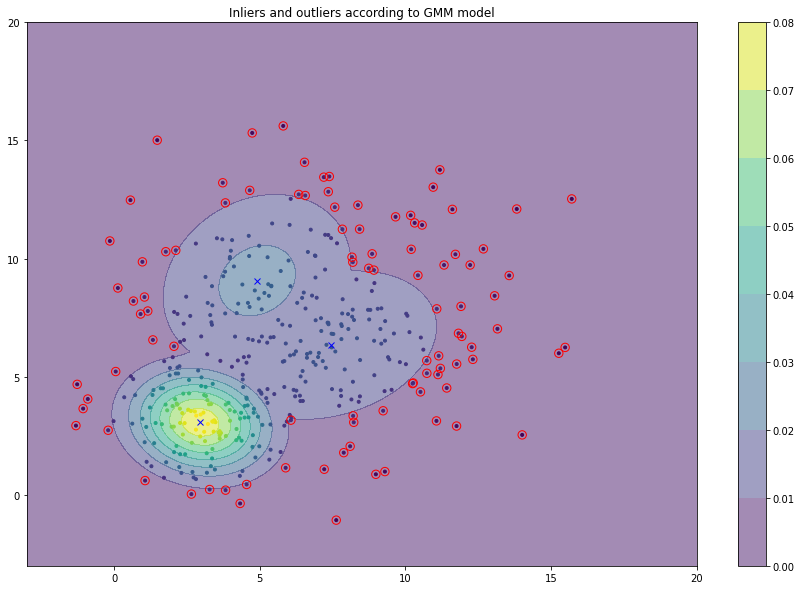

In [15]:
outlier_prob = .01
outliers = np.nonzero(pj < outlier_prob)[0]

fig1 = plt.figure(figsize=(15,10))

xlist = np.linspace(-3, 20, 100)
ylist = np.linspace(-3, 20, 100)
XX, YY = np.meshgrid(xlist, ylist)
ZZ = np.zeros(XX.shape)

for c in np.arange(0,k):    
    X_class = X[np.where(X_label[:,2] == c)[0],:]
    
    Z = np.zeros(XX.shape)
    i = 0
    while i < XX.shape[0]:
        j = 0
        while j < XX.shape[0]:
            pt = np.array([[XX[i,j], YY[i,j]]])
            Z[i,j] = Gaussian(pt, Mu[:,c], Sigma[c])[0]
            j = j + 1
        i = i + 1    
    ZZ = np.maximum(ZZ,Z)
cp = plt.contourf(XX, YY, ZZ,alpha=0.5)
cbar = fig1.colorbar(cp)

plt.scatter(X[:,0],X[:,1],marker=".",c=pj,cmap='viridis');
plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);
plt.plot(Mu[0,0], Mu[1,0],'bx',Mu[0,1], Mu[1,1],'bx', Mu[0,2], Mu[1,2],'bx')

plt.title('Inliers and outliers according to GMM model')
plt.show()

## Question 6 (10 points)

Consider the following problem: Students taking classes in Room TC 103 often feel the room is too cold or too hot. To solve the problem, we connect three air conditioners' on/off switches to a computer, place a temperature sensor outdoors next to the room, and put a button box on each student's desk with 3 buttons, labeled "I'm freezing," "I'm sweating", and "I feel good." Students can press any of the three buttons to indicate their comfort level. Every 10 minutes, the outdoor temperature is measured in degrees Celsius, and the current comfort level of each student (1, 2, or 3) is measured. The system gets the measurements as input and then has to set the control for each of the three air conditioners to high, low, or off for the next 10 minutes.

Suppose you would like to build a reinforcement learning agent to optmize the air conditioning control for the room. Do the following:

1. Briefly explain the state space, action space, reward function, and discount factor you think should be used for this problem.
2. Briefly explain the reason it is difficult to know the transition probabilities for this problem.
3. Briefly describe how you could use a neural network to learn the state transition probabilities.

*Write your explanations here.*